## Online Payments Fraud Detection of BLOSSOM BANK

### About Blossom bank
Blossom Bank is also known as BB PLC, is a multinational financial service group, that offers retail and investment banking, pension management asset management and payment services, headquartered in London, UK.

### What is fraud detection
Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses, it is also use to identify fradulent actions and scams.

#### Objective
The aim of this project is to detect fraudulent online payment transaction in Blossom Bank,this project is important to the bank in order to block fraudulent transaction.

#### Benefit
##### The bank benefit are 
* It help them predict the posibility of frauds transaction in order to avoid them before they even occur.
* It help them to flag suspicious transaction.
* It help to minimize the risk of financial loss to which the fraud expose them.
* It help them to identify their illegitimate customers.
* It also help them to see the big picture when evaluating application, documents, and inquiries.


 

In [1]:
# importing neccessary libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv('payment.csv')

In [3]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [5]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
step,1048575.0,2.696617e+01,1.562325e+01,1.0,15.000,20.00,39.000,95.0
amount,1048575.0,1.586670e+05,2.649409e+05,0.1,12149.065,76343.33,213761.890,10000000.0
oldbalanceOrg,1048575.0,8.740095e+05,2.971751e+06,0.0,0.000,16002.00,136642.020,38900000.0
newbalanceOrig,1048575.0,8.938089e+05,3.008271e+06,0.0,0.000,0.00,174599.990,38900000.0
oldbalanceDest,1048575.0,9.781600e+05,2.296780e+06,0.0,0.000,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,1.114198e+06,2.416593e+06,0.0,0.000,218260.36,1149807.510,42200000.0
isFraud,1048575.0,1.089097e-03,3.298351e-02,0.0,0.000,0.00,0.000,1.0


In [6]:
fraud.shape

(1048575, 10)

In [7]:
fraud.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

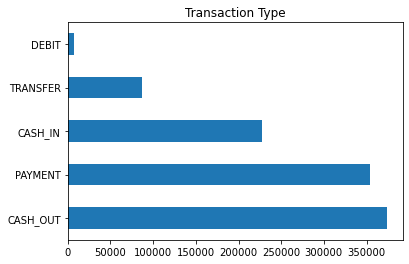

In [8]:
fraud.type.value_counts().plot.barh()
plt.title('Transaction Type')
plt.show

#### This show that Cash_IN have the highest transaction type folow by Payment and Cash_IN

In [9]:
# the value count 
fraud.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [10]:
fraud.isFraud.value_counts(normalize=True)

0    0.998911
1    0.001089
Name: isFraud, dtype: float64

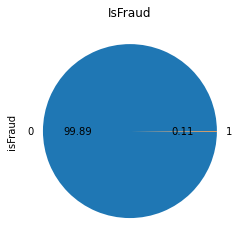

In [56]:
fraud.isFraud.value_counts().plot.pie(autopct='%.2f')
plt.title('IsFraud')
plt.show()

#### This show that 99.8% of our data are not fradulent transaction while the fraudulent is up to 1% of our data.

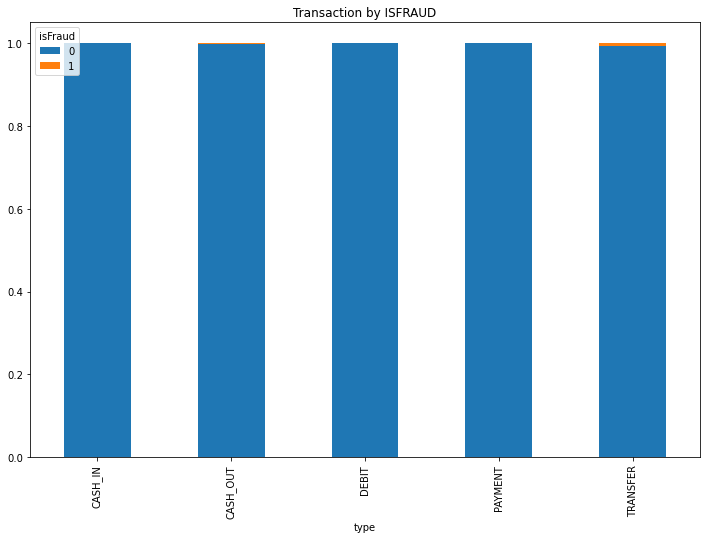

In [12]:
type_isFraud_pivot = pd.crosstab(fraud.type,fraud.isFraud,normalize='index')

type_isFraud_pivot.plot.bar(stacked=True,figsize=(12,8))
plt.title('Transaction by ISFRAUD')
plt.show()

#### This implies that, fraudulent transaction only occur on Transfer and Cash_OUT, the Transfer has the highest fraudulent transaction.

In [13]:
# creating column that will have categorical data that will be encode
categorical = ['type']

In [14]:
# encoding
categories_dummies = pd.get_dummies(fraud[categorical])
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [15]:
fraud = pd.concat([fraud, categories_dummies], axis=1)

#check what you have done
print(fraud.shape)
fraud.head()

(1048575, 15)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [16]:
fraud.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)
fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [17]:
y = fraud.isFraud
X = fraud.drop('isFraud', axis=1)

In [43]:
# inporting libraries

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [44]:
#split into training and validation sets using a 30% split ratio
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3)

In [51]:
# Initialising model
KN = KNeighborsClassifier()
RF = RandomForestClassifier()

# creating model
models = [KN,RF]

In [52]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_valid,y_valid):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_valid)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_valid)))
    print(confusion_matrix(prediction, y_valid))
    print(classification_report(prediction,y_valid))
    #print(classification_report(prediction,y_valid)) #use this later

In [53]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_valid,y_valid)


For KNeighborsClassifier, Accuracy score is 0.99946276380999 

[[314189    136]
 [    33    215]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314325
           1       0.61      0.87      0.72       248

    accuracy                           1.00    314573
   macro avg       0.81      0.93      0.86    314573
weighted avg       1.00      1.00      1.00    314573


For RandomForestClassifier, Accuracy score is 0.9997774761343154 

[[314213     61]
 [     9    290]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314274
           1       0.83      0.97      0.89       299

    accuracy                           1.00    314573
   macro avg       0.91      0.98      0.95    314573
weighted avg       1.00      1.00      1.00    314573



### KNeighbors Model
* Accuracy Score - 0.9994%
* Precision - 0.61%
* Recall - 0.87%
* True Positive - 314189
* False Negative - 136
* False Positive - 33
* True Negative - 215

### RamdomForest Model
* Accuracy Score - 0.9997%
* Precision - 0.83%
* Recall - 0.97%
* True Positive - 314213
* False Negative - 61
* False Positive - 9
* True Negative - 290




#### The two model pocess good accuracy score, therefore, the recall will be the metric to consider

## Conclusion
The RamdomForest Model is the best model to cosider, he has the highest recall and the lowest false negative